In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pystan
import scipy
import math
from pylab import plot,show,hist,figure,title

In [3]:
df = pd.read_excel("/Users/apple/Downloads/userVisits.xlsx")
df.head()

,user_id,total_visits,weeklyVisits,Interval_visits_int
0,1332384,70,"0,0,0,1,2,1,1,0,0,2,1,0,0,2,1,0,0,0,1,1,2,1,0,...","[3, 0, 0, 0, 2, 0, 2, 0, 3, 0, 0, 0, 1, 4, 2, ..."
1,1332636,4,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[62, 12, 1, 28]"
2,1334543,4,"1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","[6, 0]"
3,1336195,1,"0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",[113]
4,1339702,16,"1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...","[110, 14, 29, 7, 29, 2, 2, 1, 0, 2, 4, 1, 1, 1..."


In [6]:
df = df.loc[df.total_visits > 10]

In [7]:
len(df['user_id'])

4879

In [3]:
df = df.iloc[df.index <= 200]

In [8]:
visits = df['weeklyVisits'].tolist()

In [9]:
visits_int = list(list(int(a) for a in (str(r).split(',')))for r in visits)

KeyboardInterrupt: 

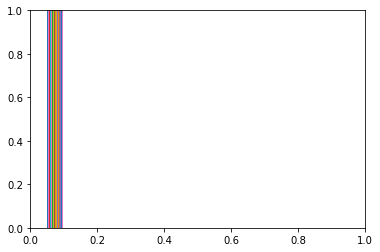

In [10]:
hist(visits_int,range = [0,5])

(array([   0., 2420., 1098.,  544.,  317.,  171.,  110.,   71.,   40.,
          43.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

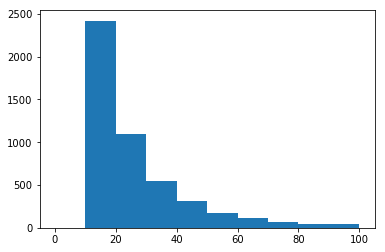

In [11]:
hist(df['total_visits'], range =[0,100])

In [10]:
plt.show()

In [6]:
len(visits_int)

201

In [7]:
len(visits_int[10])

113

In [20]:
visitsgSir_code = """
data {
    int<lower=0> J;// number of users
    int<lower=0> G;// number of groups
    int<lower=0> W;// number of weeks
    
    int y[J,W]; // estimated number of visits next week
    
}
parameters {
    //real<lower=0> alpha[G,J];
    real<lower=0,upper=1> tau[G,J];
    
    real<lower=0> eta[J];
    real <lower=0> etag[G];
}
transformed parameters {

     real 
     real alpha[G];
     real<lower=0> gCon[J];
     real <lower=0,upper=1> count;
     
     
     for(g in 1:G){
     alpha[G]=1.0;
     }
     
     
     for(j in 1:J)
     gCon[j]=0;
     
     
     for (g in 1:G){
     
     for (j in 1:J){
     gCon[j]= gCon[j] + etag[g]*alpha[g,j];
     }
     }
     
}
model {

    alpha ~ dirichlet(G,1,1)
    //for(g in 1:G){
    
    etag ~ multinomial
    
    //}
    
    for (j in 1:J){
    for(g in 1:G){
     
    tau[g,j] ~ dirichlet(G,alpha[j,G]);

    }
    }
    
    for(j in 1:J){
    eta[j] ~ multinomial(gCon[j],2.0);
    }
    for (j in 1:J){
    for(w in 1:W){
    y[j,w] ~ poisson(eta[j]);
    }
 }
}
"""



visitsgSir_dat = {'J': len(visits_int),
              'W':113,
              'G':5,
              
              'y': visits_int
               }



sm = pystan.StanModel(model_code=visitsgSir_code)
fit = sm.sampling(data=visitsgSir_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_67421b3f9a1a86bcdbd76080e7ad65b7 NOW.


In [21]:
fit


Inference for Stan model: anon_model_67421b3f9a1a86bcdbd76080e7ad65b7.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
tau[0,0]        0.5  5.0e-3   0.23    0.1   0.32    0.5   0.68    0.9   2000    1.0
tau[1,0]        0.5  5.0e-3   0.22   0.11   0.32   0.49   0.68   0.89   2000    1.0
tau[2,0]       0.51  5.0e-3   0.22    0.1   0.33    0.5   0.68   0.91   2000    1.0
tau[3,0]        0.5  4.9e-3   0.22   0.12   0.33    0.5   0.67   0.88   2000    1.0
tau[4,0]        0.5  4.9e-3   0.22    0.1   0.33   0.49   0.66    0.9   2000    1.0
tau[0,1]        0.5  4.9e-3   0.22   0.09   0.33    0.5   0.67   0.91   2000    1.0
tau[1,1]        0.5  5.1e-3   0.23   0.09   0.33    0.5   0.68   0.91   2000    1.0
tau[2,1]        0.5  5.0e-3   0.22    0.1   0.34   0.51   0.68   0.91   2000    1.0
tau[3,1]       0.51  4.8e-3   0.21   0.11   0.34   0.51  